In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ej Clasificación de Fashion MNIST

A partir de la notebook "Ejemplo-Fashion-MNIST.ipynb" armar una serie de clasificadores bayesianos:

1) Todos los pixels tiene la misma distribución de probabilidades para cada clase de grises y se generan de manera independiente.

2) Se separa la imagen en cuatro cuadrantes y los pixels de cada cuadrante tienen la misma distribución de probabilidades para cada clase y se generan de manera independiente.

Se pide estimar las probabilidades de niveles de grises para cada caso utilizando un subconjunto de entrenamiento de los datos y en función de esa estimación medir la performance del modelo con un subconjunto de validación

In [5]:
folder = './'
images = np.load(folder+'train_images.npy')
labels = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)

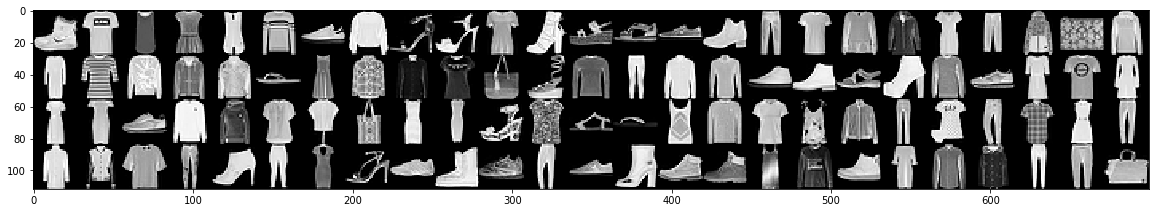

In [6]:
from MNIST_helper import plot_numbers
plot_numbers(images.reshape(-1,28,28),range(100), columns=25, figsize=(20, 20))

# Ejercicio 1: color promedio en un unico pixel
Entrenamiento

In [7]:
print(images.shape)
print(labels.shape)

(60000, 28, 28)
(60000,)


In [8]:
print(labels)

[9. 0. 0. ... 3. 0. 5.]


Categoria de imagen: 2.0
Color promedio: 107.35331632653062


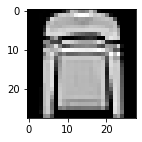

In [9]:
# Prueba de calculo para un elemento de la muestra de entrenamiento
id=5
print("Categoria de imagen:",labels[id])
prom_unit=images[id].mean()
print("Color promedio:",prom_unit)
plt.figure(figsize=(2,2))
plt.imshow(images[id], cmap='gray')

In [10]:
unipixels=[]
i=0
for i in range(0,len(images[:,0,0])):
   unipixels.append(images[i].mean())
unipixels=np.array(unipixels)
j=0
for j in range(0,10):
    print(j,":",unipixels[j])

0 : 97.25382653061224
1 : 107.90561224489795
2 : 36.558673469387756
3 : 59.50127551020408
4 : 78.04464285714286
5 : 107.35331632653062
6 : 41.48724489795919
7 : 146.9158163265306
8 : 25.372448979591837
9 : 51.90816326530612


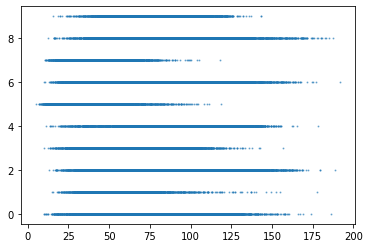

In [11]:
plt.scatter(unipixels,labels,s=1,alpha=0.5)

In [12]:
df_train=pd.DataFrame({'label':labels,'unipixel':unipixels})
df_trainavg=df_train.groupby('label').mean()
df_trainavg=df_trainavg.sort_values('unipixel')
df_trainavg
#lista.shape()
#for m in labels:
    

,unipixel
label,
5.0,34.867547
7.0,42.762072
1.0,56.840855
3.0,66.018909
9.0,76.805118
0.0,83.029980
6.0,84.605120
8.0,90.157153
2.0,96.058763


In [13]:
trainavg_unipixel=df_trainavg['unipixel'].values
trainavg_label=df_trainavg.index



Predicción y Testeo


In [14]:
test=42
busc=np.absolute(trainavg_unipixel-test)
pos=np.argmin(busc)
test_pred=trainavg_label[pos]
print(pos,test_pred)

1 7.0


In [15]:
folder = './'
images_test = np.load(folder+'test_images.npy')
labels_test = np.loadtxt(folder+'test_labels.csv', delimiter=',', skiprows=1)
labels_test = labels_test[:,0]

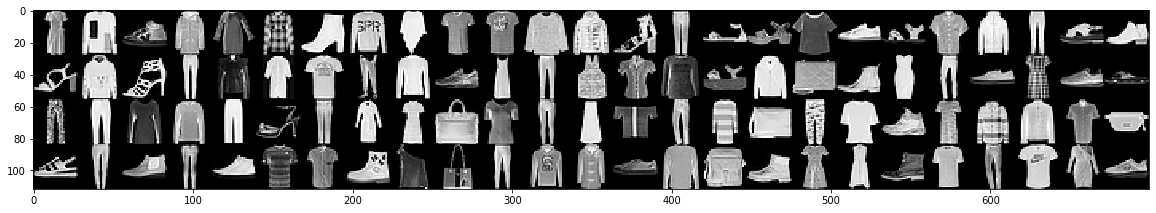

In [16]:
plot_numbers(images_test.reshape(-1,28,28),range(100), columns=25, figsize=(20, 20))

Categoria de imagen: 2.0
Color promedio: 137.0012755102041
Categoría predicha: 4.0


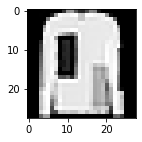

In [17]:
id=1
print("Categoria de imagen:",labels_test[id])
prom_unit=images_test[id].mean()
print("Color promedio:",prom_unit)

# Predición de la categoria buscando la minima diferencia respecto del color promedio de cada grupo
busc=np.absolute(trainavg_unipixel-prom_unit)
pos=np.argmin(busc)
test_pred_unit=trainavg_label[pos]
print('Categoría predicha:',test_pred_unit)

# Grafico de la imagen predicha
plt.figure(figsize=(2,2))
plt.imshow(images_test[id], cmap='gray')

In [18]:
unipixels_test=[]
i=0
for i in range(0,len(images_test[:,0,0])):
   unipixels_test.append(images_test[i].mean())
unipixels_test=np.array(unipixels_test)
print(unipixels_test)

[ 59.24489796 137.00127551  38.67091837 ... 115.78316327 116.30612245
  37.9005102 ]


In [19]:
test_pred=[]
i=0
for i in unipixels_test:
    busc=np.absolute(trainavg_unipixel-i)
    pos=np.argmin(busc)
    test_pred.append(trainavg_label[pos])
test_pred=np.array(test_pred)
print(test_pred)

[1. 4. 5. ... 4. 4. 5.]


In [20]:
pred_corr=labels_test==test_pred
acc=pred_corr.sum() / len(pred_corr)
print('Accuracy:',acc)

Accuracy: 0.2544


# Ejercicio 2: color promedio en 4 pixeles
Entrenamiento

Categoria de imagen: 7.0
Color promedio: 41.48724489795919
Imagen en 4 pixeles: [ 9.55102041 54.54081633 36.20918367 65.64795918]


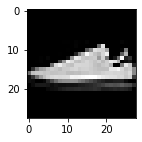

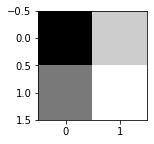

In [21]:
# Prueba de calculo para un elemento de la muestra de entrenamiento
id=6
print("Categoria de imagen:",labels[id])
plt.figure(figsize=(2,2))
plt.imshow(images[id], cmap='gray')
prom_unit=images[id].mean()
print("Color promedio:",prom_unit)

cut=np.array(images[id])
cuad_1= cut[0:14,0:14].mean()
cuad_2= cut[14:28,0:14].mean()
cuad_3= cut[0:14,14:28].mean()
cuad_4= cut[14:28,14:28].mean()

cuatripixel_unit=np.array([cuad_1,cuad_2,cuad_3,cuad_4])

plt.figure(figsize=(2,2))
print('Imagen en 4 pixeles:',cuatripixel_unit)
plt.imshow(cuatripixel_unit.reshape(2,2), cmap='gray')

In [22]:
# Transformo las imagenes a 4 pixeles promediados
cuatripixel=[]

for n in range(0,len(images[:,0,0])):
    cut=np.array(images[n])
    cuad_1= cut[0:14,0:14].mean()
    cuad_2= cut[14:28,0:14].mean()
    cuad_3= cut[0:14,14:28].mean()
    cuad_4= cut[14:28,14:28].mean()
    cuatripixel.append([cuad_1,cuad_2,cuad_3,cuad_4])
        
cuatripixel=np.array(cuatripixel)

for j in range(0,10):
    print(j,":",cuatripixel[j])

0 : [  7.84693878 120.18877551 112.05612245 148.92346939]
1 : [110.92857143  86.06632653 125.3877551  109.23979592]
2 : [34.97959184 31.45408163 41.70408163 38.09693878]
3 : [66.09183673 50.95918367 60.2244898  60.72959184]
4 : [72.08163265 87.48469388 67.06632653 85.54591837]
5 : [104.65816327 105.80612245 107.68367347 111.26530612]
6 : [ 9.55102041 54.54081633 36.20918367 65.64795918]
7 : [142.04591837 138.17857143 156.0255102  151.41326531]
8 : [ 1.30102041 25.84693878 39.34693878 34.99489796]
9 : [  2.41836735 101.09183673  64.26530612  39.85714286]


In [23]:
df_trainc=pd.DataFrame({'label':labels,'cpixel0':cuatripixel[:,0],'cpixel1':cuatripixel[:,1],'cpixel2':cuatripixel[:,2],'cpixel3':cuatripixel[:,3]})
df_traincavg=df_trainc.groupby('label').mean()
df_traincavg

,cpixel0,cpixel1,cpixel2,cpixel3
label,,,,
0.0,87.266271,74.543513,91.261220,79.048918
1.0,61.987079,48.491245,67.885947,48.999150
2.0,92.978931,96.510164,95.381080,99.364875
3.0,60.378967,67.394889,64.127752,72.174027
4.0,90.548814,102.094028,94.409024,105.980156
5.0,7.349523,44.070179,38.433719,49.616765
6.0,80.449897,85.090191,83.686895,89.193496
7.0,11.365062,50.354302,47.331916,61.997009
8.0,62.237949,113.870149,67.632932,116.887582


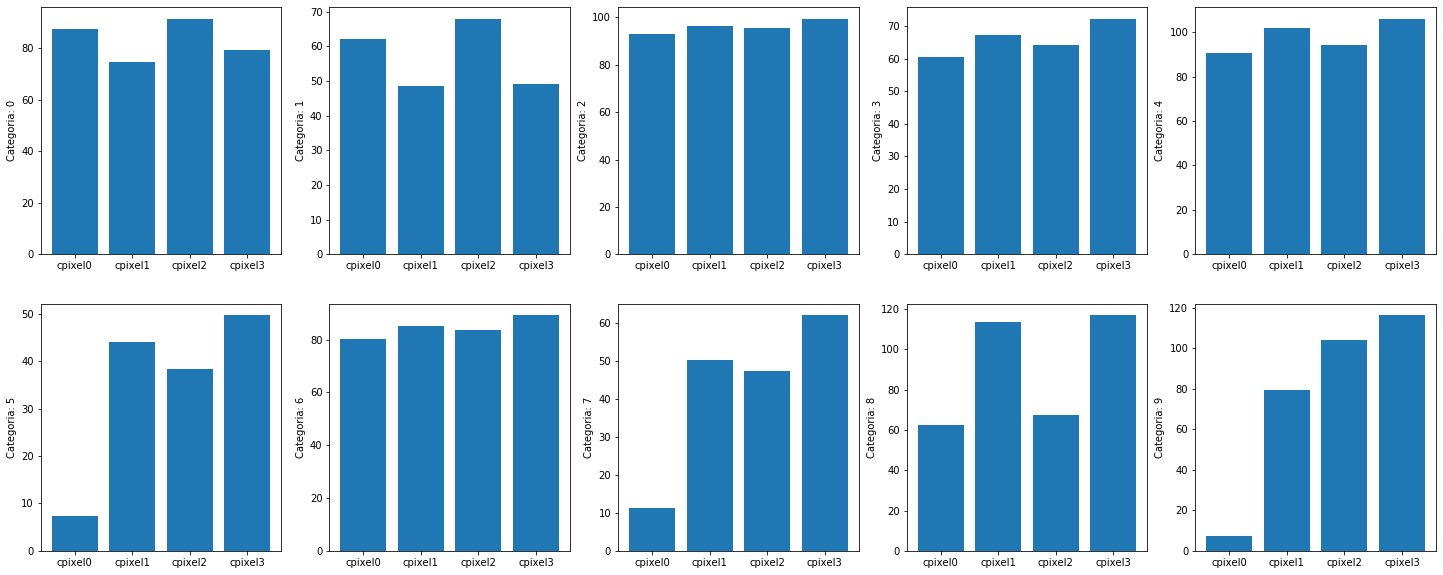

In [24]:
fig, axs = plt.subplots(2, 5,figsize=(25,10))
axs[0, 0].bar(df_traincavg.columns, df_traincavg.loc[0].values)
axs[0, 1].bar(df_traincavg.columns, df_traincavg.loc[1].values)
axs[0, 2].bar(df_traincavg.columns, df_traincavg.loc[2].values)
axs[0, 3].bar(df_traincavg.columns, df_traincavg.loc[3].values)
axs[0, 4].bar(df_traincavg.columns, df_traincavg.loc[4].values)
axs[1, 0].bar(df_traincavg.columns, df_traincavg.loc[5].values)
axs[1, 1].bar(df_traincavg.columns, df_traincavg.loc[6].values)
axs[1, 2].bar(df_traincavg.columns, df_traincavg.loc[7].values)
axs[1, 3].bar(df_traincavg.columns, df_traincavg.loc[8].values)
axs[1, 4].bar(df_traincavg.columns, df_traincavg.loc[9].values)
axs[0, 0].set_ylabel('Categoria: 0')
axs[0, 1].set_ylabel('Categoria: 1')
axs[0, 2].set_ylabel('Categoria: 2')
axs[0, 3].set_ylabel('Categoria: 3')
axs[0, 4].set_ylabel('Categoria: 4')
axs[1, 0].set_ylabel('Categoria: 5')
axs[1, 1].set_ylabel('Categoria: 6')
axs[1, 2].set_ylabel('Categoria: 7')
axs[1, 3].set_ylabel('Categoria: 8')
axs[1, 4].set_ylabel('Categoria: 9')
plt.show()


Predicción y Testeo


In [25]:
#test= 1:[65,65,52,45]  5:[8,40,70,20]
mtraincavg=df_traincavg.to_numpy()

t_manual=[7,45,38,50]
abs=np.absolute(mtraincavg-t_manual)
dist=[]
for i in range(0,len(abs[:,0])):
    dist.append(abs[i].sum())
dist
pred=np.argmin(dist)
print('Categoria predicha para t_manual:',pred)
print(" ")

t_muestra=[cuatripixel[id]]
abs=np.absolute(mtraincavg-t_muestra)
dist=[]
for i in range(0,len(abs[:,0])):
    dist.append(abs[i].sum())
dist
pred=np.argmin(dist)
print('ID de imagen de muestra:',id)
print('Categoria real de t_muestra:',labels[id])
print('Pixels promedio de t_muestra:',t_muestra)
print('Categoria predicha para t_muestra:',pred)

Categoria predicha para t_manual: 5
 
ID de imagen de muestra: 6
Categoria real de t_muestra: 7.0
Pixels promedio de t_muestra: [array([ 9.55102041, 54.54081633, 36.20918367, 65.64795918])]
Categoria predicha para t_muestra: 7


In [26]:
cuatripixels_test=[]

for n in range(0,len(images_test[:,0,0])):
    cut=np.array(images_test[n])
    cuad_1= cut[0:14,0:14].mean()
    cuad_2= cut[14:28,0:14].mean()
    cuad_3= cut[0:14,14:28].mean()
    cuad_4= cut[14:28,14:28].mean()
    cuatripixels_test.append([cuad_1,cuad_2,cuad_3,cuad_4])
        
cuatripixels_test=np.array(cuatripixels_test)
cuatripixels_test=cuatripixels_test.reshape(len(images_test[:,0,0]),4)
print(cuatripixels_test)

[[ 55.04081633  60.73979592  60.81632653  60.38265306]
 [114.9744898  143.95918367 148.90816327 140.16326531]
 [  5.90816327  35.40816327  53.92346939  59.44387755]
 ...
 [117.73979592 107.65306122 121.05612245 116.68367347]
 [113.94897959 102.94387755 129.05612245 119.2755102 ]
 [ 18.17857143  38.59693878  47.1122449   47.71428571]]


In [27]:
cuatripixels_pred=[]
for i in range(0,len(cuatripixels_test[:,0])):
    xt=cuatripixels_test[i]
    abs=np.absolute(mtraincavg-xt)
    dist=[]
    for j in range(0,len(abs[:,0])):
        dist.append(abs[j].sum())
    cuatripixels_pred.append(np.argmin(dist))    
print('Categorias predichas para las 10 primeras imagenes de Test:',cuatripixels_pred[0:10])

Categorias predichas para las 10 primeras imagenes de Test: [3, 4, 7, 4, 1, 3, 9, 4, 0, 3]


In [28]:
cuatri_pred_corr=labels_test==cuatripixels_pred
acc=cuatri_pred_corr.sum() / len(cuatri_pred_corr)
print('Accuracy:',acc)

Accuracy: 0.4396
